In [1]:
import numpy as np
import pandas as pd

In [2]:
URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx'

df_can = pd.read_excel(
    URL,
    sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2)
print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [3]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [4]:
# Dimensões
print(df_can.shape)

(195, 43)


In [5]:
# Limpeza para remover colunas desnecessárias (eg. REG) 
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

# Renomeando para que as colunas façam sentido
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# Para manter a consistência, transformar todas as labels das colunas em string
df_can.columns = list(map(str, df_can.columns))

# Colocar o nome dos paises como index
df_can.set_index('Country', inplace=True)

# Adicona a coluna Total
df_can['Total'] = df_can.sum(axis=1)

# Anos que usaremos, útil para gerar gráficos depois
years = list(map(str, range(1980, 2014)))
print('Dimensões:', df_can.shape)

Dimensões: (195, 38)


C:\Users\emidi\AppData\Local\Temp\ipykernel_13128\1104207953.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total'] = df_can.sum(axis=1)


In [6]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')

In [10]:
# Pie Chart (Gráfico de pizza)
df_continents = df_can.groupby('Continent', axis=0).sum() #Agrupo por continentes e depois soma
print(type(df_can.groupby(('Continent'), axis=0)))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


C:\Users\emidi\AppData\Local\Temp\ipykernel_13128\694414715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_continents = df_can.groupby('Continent', axis=0).sum() #Agrupo por continentes e depois soma


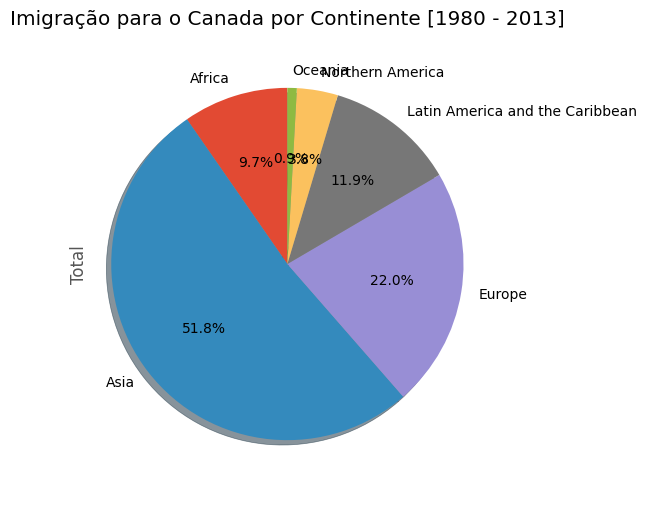

In [11]:
df_continents['Total'].plot(kind='pie',
                           figsize=(5, 6),
                           autopct='%1.1f%%',
                           startangle=90,
                           shadow=True,
                           )
plt.title('Imigração para o Canada por Continente [1980 - 2013]')
plt.axis('equal')

plt.show()

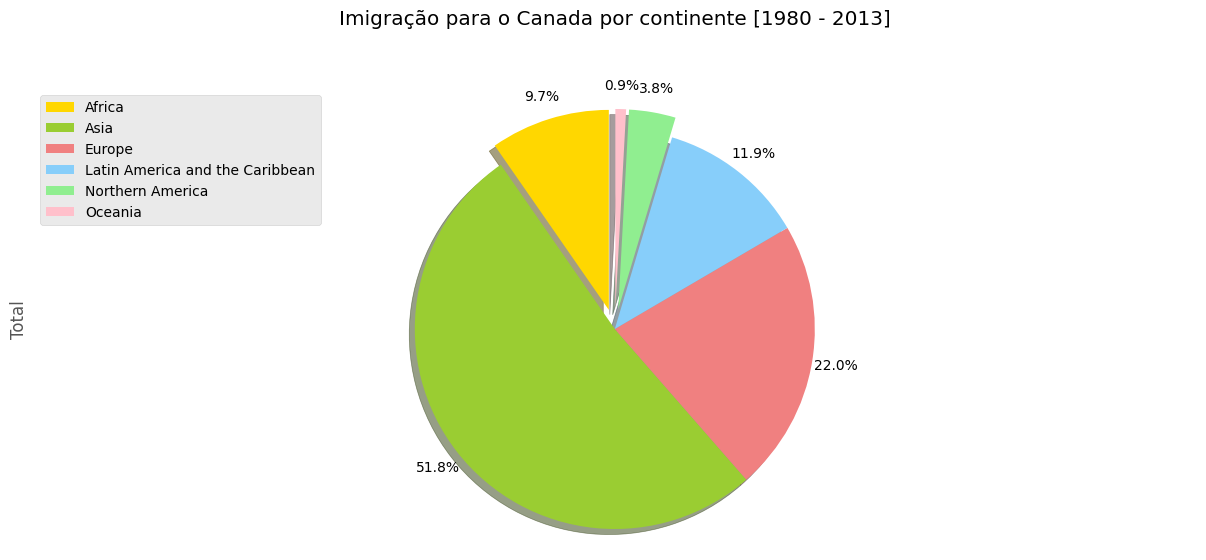

In [12]:
# Modificações para melhorar o visual
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1]

df_continents['Total'].plot(kind='pie',
                           figsize=(15, 6),
                           autopct = '%1.1f%%',
                           startangle=90,
                           shadow=True,
                           labels=None, #Desliga as labels
                           pctdistance=1.12, # a proporção entre o centro de cada fatia de pizza e o início do texto gerado
                           colors=colors_list, # Adiciona cores diferentes
                           explode=explode_list #'explode' os 3 menores continentes
                           )
plt.title("Imigração para o Canada por continente [1980 - 2013]", y=1.12)
plt.axis('equal')
#Adiciona legenda
plt.legend(labels=df_continents.index, loc='upper left')

plt.show()

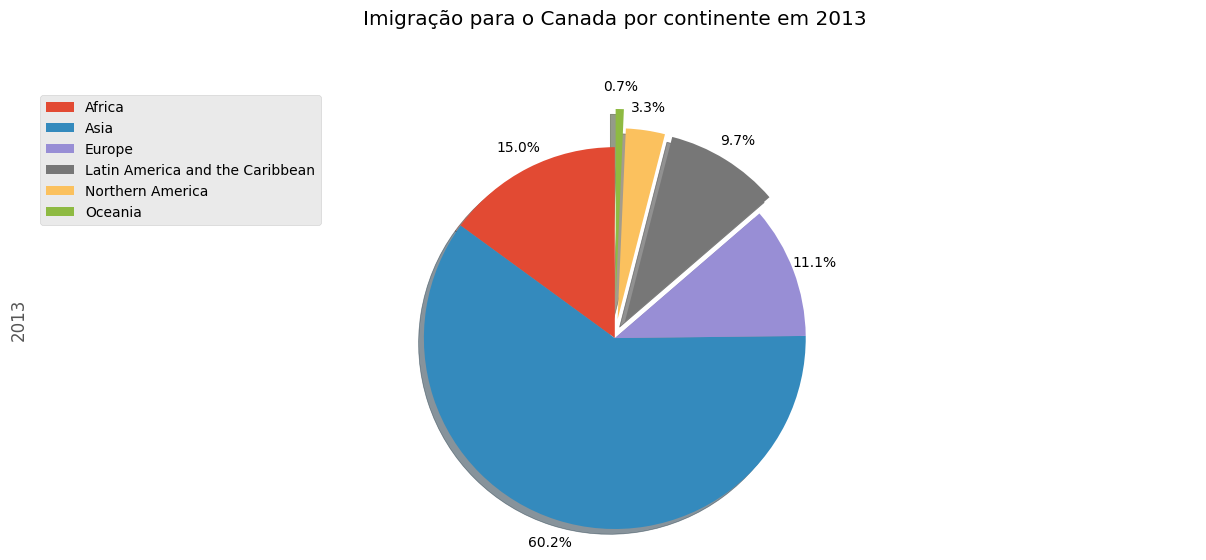

In [13]:
# Questão: Usando um gráfico de pizza, explore a proporção (percentual) de novos imigrantes agrupados por
# continentes no ano de 2013.
explode_list = [0.0, 0, 0, 0.1, 0.1, 0.2]

df_continents['2013'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,                
                            pctdistance=1.12,            
                            explode=explode_list         
                                )
plt.title("Imigração para o Canada por continente em 2013", y=1.12)
plt.axis('equal')

plt.legend(labels=df_continents.index, loc='upper left')

plt.show()

In [14]:
# Box Plots
df_japan = df_can.loc[['Japan'], years].transpose()
df_japan.head()

Country,Japan
1980,701
1981,756
1982,598
1983,309
1984,246


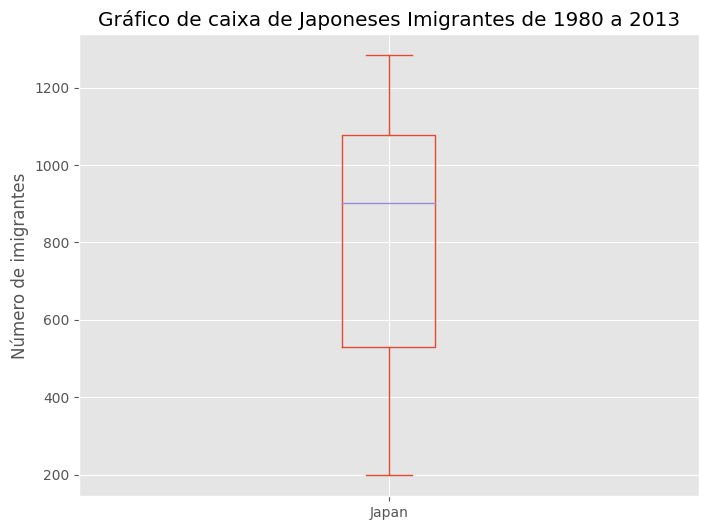

In [15]:
df_japan.plot(kind='box', figsize=(8,6))

plt.title("Gráfico de caixa de Japoneses Imigrantes de 1980 a 2013")
plt.ylabel("Número de imigrantes")
plt.show()

In [16]:
df_japan.describe()

Country,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


In [17]:
# Questão: Compare a distribuição do número de novos imigrantes da Índia e da China no período de 1980 a 2013.
df_CI = df_can.loc[['China', "India"], years].transpose()

In [18]:
df_CI.describe()

Country,China,India
count,34.000000,34.000000
mean,19410.647059,20350.117647
std,13568.230790,10007.342579
min,1527.000000,4211.000000
25%,5512.750000,10637.750000
50%,19945.000000,20235.000000
75%,31568.500000,28699.500000
max,42584.000000,36210.000000


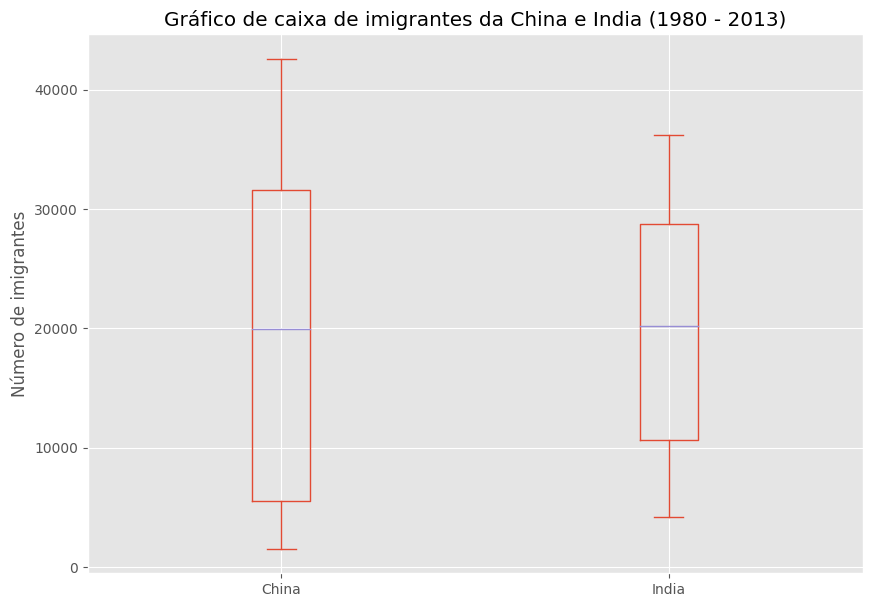

In [19]:
# Plotagem
df_CI.plot(kind='box', figsize=(10,7))

plt.title("Gráfico de caixa de imigrantes da China e India (1980 - 2013)")
plt.ylabel('Número de imigrantes')

plt.show()

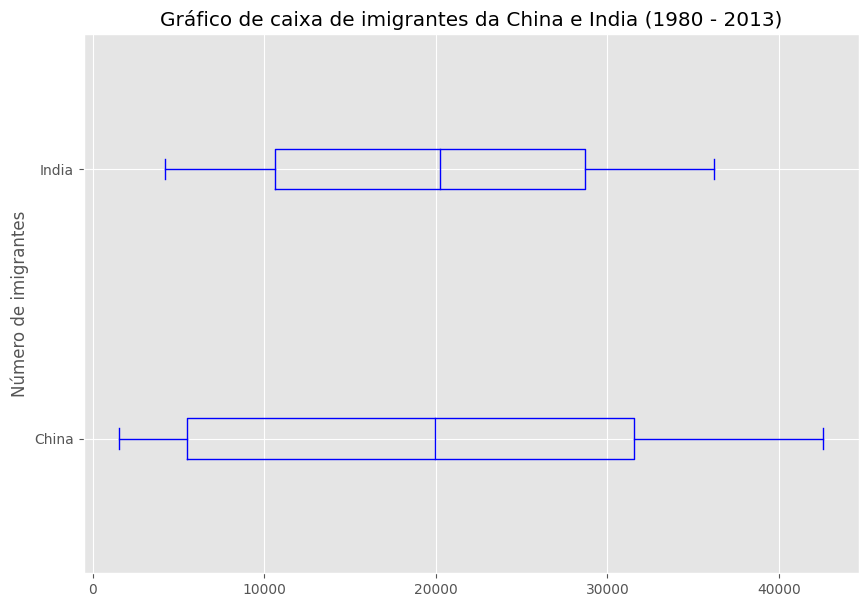

In [20]:
# Gráficos de caixa horizontais
df_CI.plot(kind='box', figsize=(10, 7), color='blue', vert=False)

plt.title("Gráfico de caixa de imigrantes da China e India (1980 - 2013)")
plt.ylabel('Número de imigrantes')

plt.show()

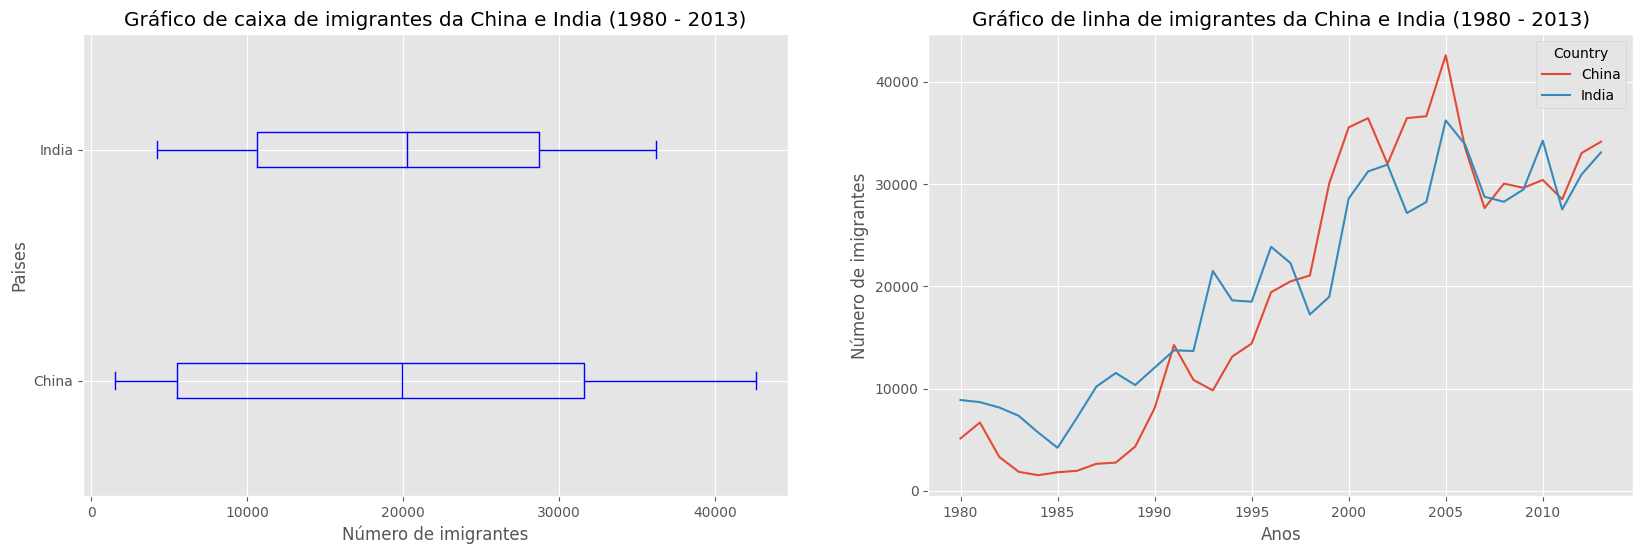

In [21]:
# Subplots
fig = plt.figure() #Cria uma figura

ax0 = fig.add_subplot(1, 2, 1) #Adiciona subplot 1 (1 linha, 2 colunas, primeiro grafico)
ax1 = fig.add_subplot(1, 2, 2) # 1 linha, 2 colunas, segundo grafico

#Subplot 1: Box plot
df_CI.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) # Adiciona para o subplot1
ax0.set_title("Gráfico de caixa de imigrantes da China e India (1980 - 2013)")
ax0.set_xlabel('Número de imigrantes')
ax0.set_ylabel('Paises')

# Subplot 2: Line plot
df_CI.plot(kind='line', figsize=(20, 6), ax=ax1) # Adiciona para subplot2
ax1.set_title ("Gráfico de linha de imigrantes da China e India (1980 - 2013)")
ax1.set_ylabel('Número de imigrantes')
ax1.set_xlabel('Anos')

plt.show()

In [22]:
# Pergunta: Crie um gráfico de caixa para visualizar a distribuição dos 15 principais países 
# (com base na imigração total) agrupados pelas décadas de 1980, 1990 e 2000.

df_top15 = df_can.sort_values(['Total'], ascending=False, axis=0).head(15)

In [23]:
years_80 = list(map(str, range(1980, 1990)))
years_90 = list(map(str, range(1990, 2000)))
years_00 = list(map(str, range(2000, 2010)))

In [24]:
# Criando uma serie para cada decada
df_80 = df_top15.loc[:, years_80].sum(axis=1)
df_90 = df_top15.loc[:, years_90].sum(axis=1)
df_00 = df_top15.loc[:, years_00].sum(axis=1)

In [25]:
# Merge das três series em um só dataframe
new_df = pd.DataFrame({'1980s':df_80, '1990s':df_90, '2000s':df_00})

new_df.head()

,1980s,1990s,2000s
Country,,,
India,82154,180395,303591
China,32003,161528,340385
United Kingdom of Great Britain and Northern Ireland,179171,261966,83413
Philippines,60764,138482,172904
Pakistan,10591,65302,127598


In [26]:
new_df.describe()

,1980s,1990s,2000s
count,15.000000,15.000000,15.000000
mean,44418.333333,85594.666667,97471.533333
std,44190.676455,68237.560246,100583.204205
min,7613.000000,30028.000000,13629.000000
25%,16698.000000,39259.000000,36101.500000
50%,30638.000000,56915.000000,65794.000000
75%,59183.000000,104451.500000,105505.500000
max,179171.000000,261966.000000,340385.000000


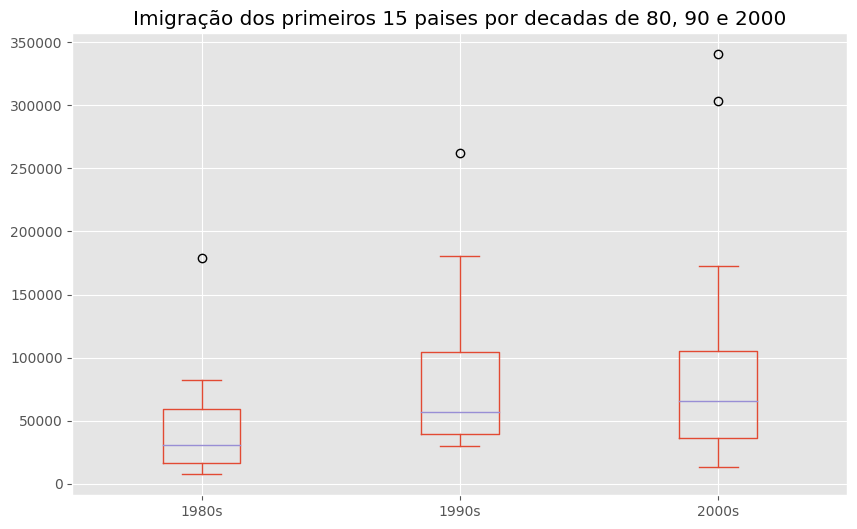

In [27]:
# Box plot
new_df.plot(kind='box', figsize=(10, 6))
plt.title("Imigração dos primeiros 15 paises por decadas de 80, 90 e 2000")
plt.show()

In [28]:
# Veficando os outliers printados no gráfico acima
new_df = new_df.reset_index()
new_df[new_df['2000s']>209611.5]

,Country,1980s,1990s,2000s
0,India,82154,180395,303591
1,China,32003,161528,340385


In [29]:
# Scatter Plots
df_tot = pd.DataFrame(df_can[years].sum(axis=0)) #Total da população por ano

#Modifica o tipo de anos para int
df_tot.index= map(int, df_tot.index)

#Reseta o index para coloca-lo de volta como uma coluna
df_tot.reset_index(inplace=True)

#Renomeia a coluna
df_tot.columns= ['year', 'total']

df_tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


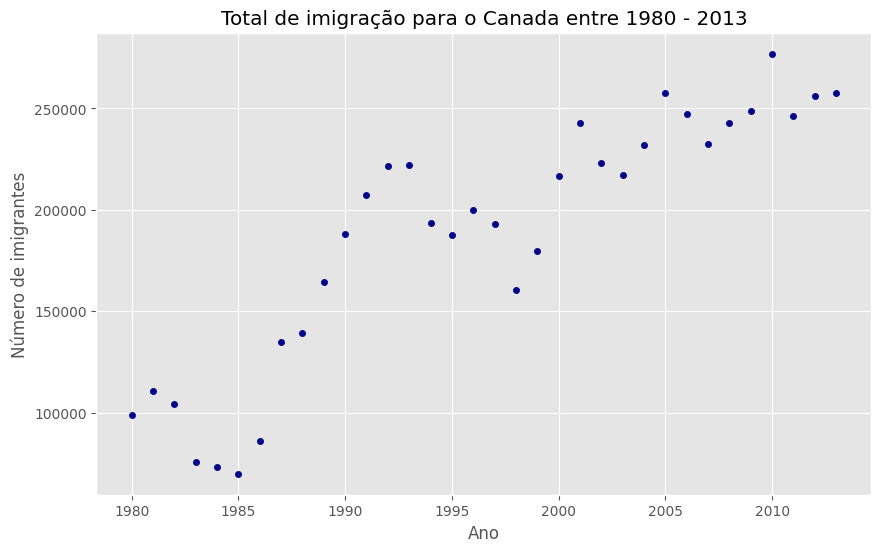

In [31]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total de imigração para o Canada entre 1980 - 2013')
plt.xlabel('Ano')
plt.ylabel('Número de imigrantes')

plt.show()

In [32]:
x = df_tot['year']
y = df_tot['total']
fit = np.polyfit(x, y, deg=1)

fit

array([ 5.56709228e+03, -1.09261952e+07])

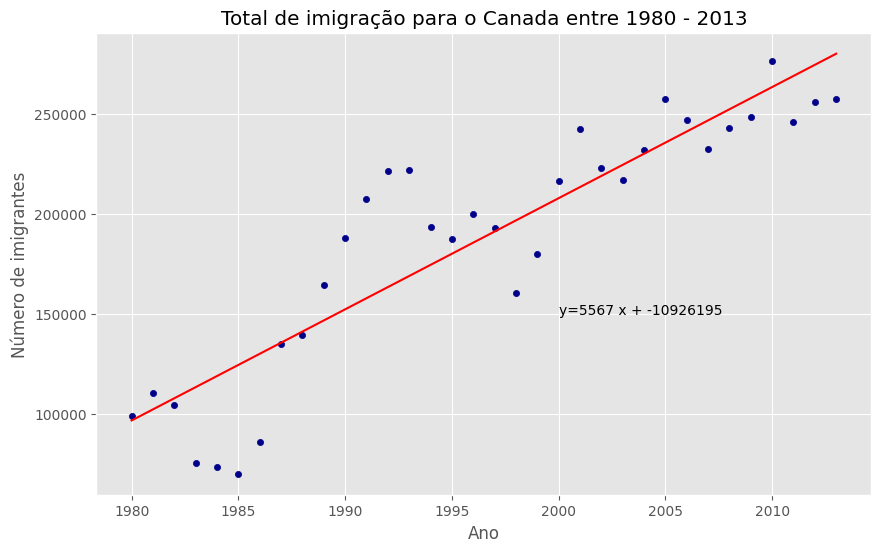

'No. Imigrantes = 5567 * Ano + -10926195'

In [33]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10,6), color='darkblue')

plt.title("Total de imigração para o Canada entre 1980 - 2013")
plt.xlabel('Ano')
plt.ylabel("Número de imigrantes")

plt.plot(x, fit[0] *x +fit[1], color='red')
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))

plt.show()

# Printa a linha de melhor fit
'No. Imigrantes = {0:.0f} * Ano + {1:.0f}'.format(fit[0], fit[1])

In [34]:
# Pergunta: Crie um gráfico de dispersão da imigração total da Dinamarca, Noruega e Suécia para o Canadá de 1980 a 2013?
df_countries = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
df_total = pd.DataFrame(df_countries.sum(axis=1))
df_total.reset_index(inplace=True)
df_total.columns = ['year', 'total']
df_total['year'] = df_total['year'].astype(int)
df_total.head()

,year,total
0,1980,669
1,1981,678
2,1982,627
3,1983,333
4,1984,252


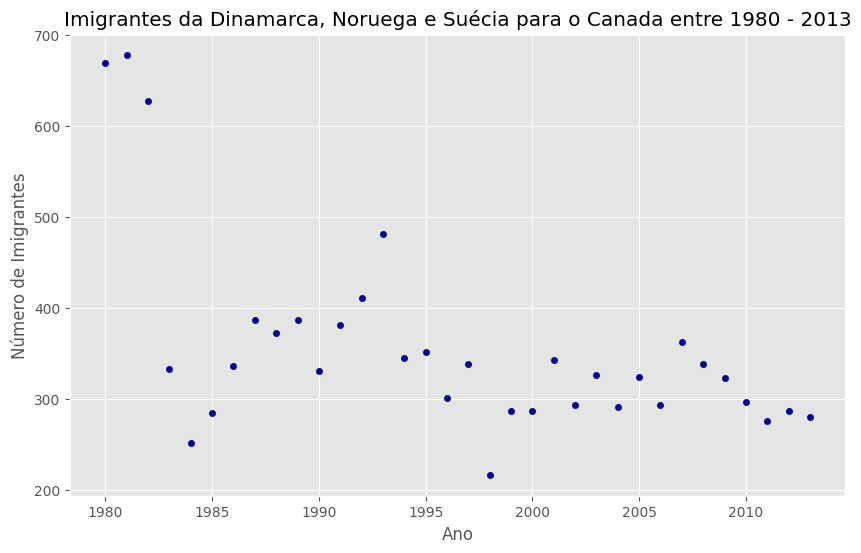

In [35]:
# Plota o Gráfico
df_total.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Imigrantes da Dinamarca, Noruega e Suécia para o Canada entre 1980 - 2013')
plt.xlabel("Ano")
plt.ylabel("Número de Imigrantes")

plt.show()

In [36]:
# Bubble Plot
df_can_t = df_can[years].transpose()
df_can_t.index = map(int, df_can_t.index)
df_can_t.index.name = 'Year'
df_can_t.reset_index(inplace=True)
df_can_t.head()

Country,Year,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Western Sahara,Yemen,Zambia,Zimbabwe
0,1980,16,1,80,0,0,1,0,368,0,...,9378,128,0,0,103,1191,0,1,11,72
1,1981,39,0,67,1,0,3,0,426,0,...,10030,132,0,0,117,1829,0,2,17,114
2,1982,39,0,71,0,0,6,0,626,0,...,9074,146,0,0,174,2162,0,1,11,102
3,1983,47,0,69,0,0,6,0,241,0,...,7100,105,0,0,124,3404,0,6,7,44
4,1984,71,0,63,0,0,4,42,237,0,...,6661,90,0,0,142,7583,0,0,16,32


In [37]:
# Normalização dos dados do Brazil
norm_brazil = (df_can_t['Brazil'] - df_can_t['Brazil'].min()) / (df_can_t['Brazil'].max() - df_can_t['Brazil'].min())

# Normalização dos dados da Argentina
norm_argentina = (df_can_t['Argentina'] - df_can_t['Argentina'].min()) / (df_can_t['Argentina'].max() - df_can_t['Argentina'].min())

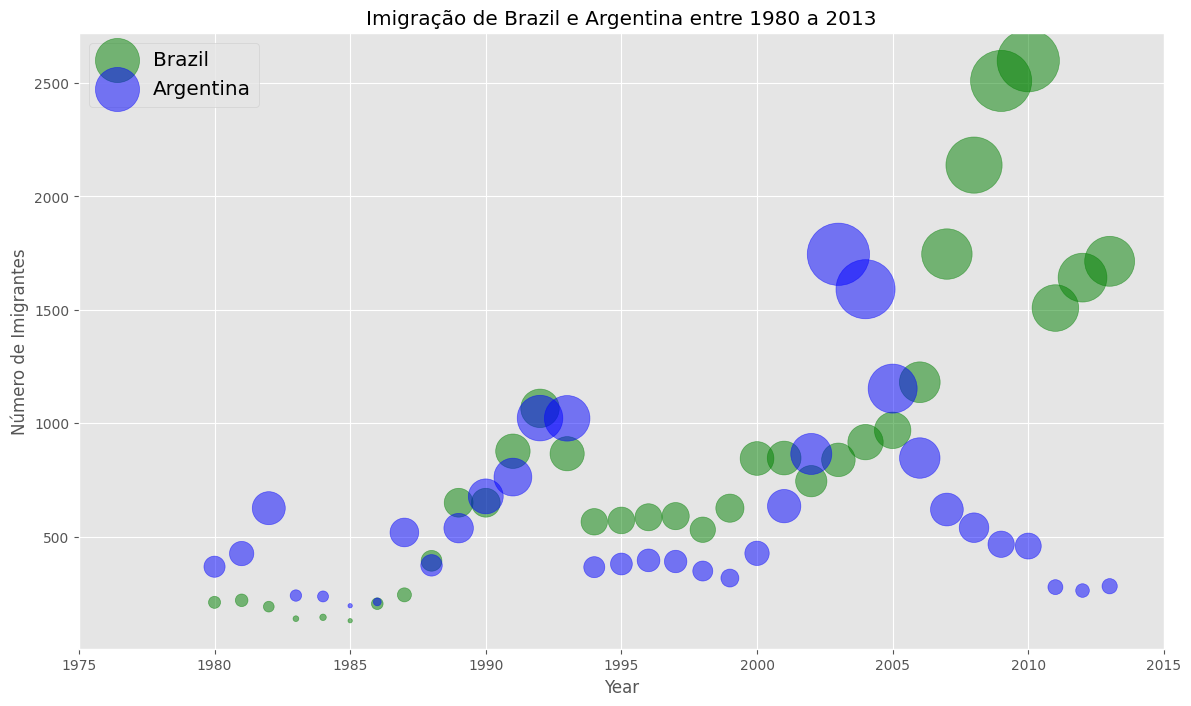

In [38]:
# Plot dos dados
ax0 = df_can_t.plot(kind='scatter',
                   x='Year',
                   y='Brazil',
                   figsize=(14, 8),
                   alpha = 0.5, #Transparência
                   color = 'green',
                   s = norm_brazil *2000 + 10,
                   xlim=(1975, 2015)
                   )
#Argentina
ax1 = df_can_t.plot(kind='scatter',
                   x='Year',
                   y='Argentina',
                   alpha = 0.5, #Transparência
                   color = 'blue',
                   s = norm_argentina *2000 + 10,
                   ax=ax0
                   )

ax0.set_ylabel("Número de Imigrantes")
ax0.set_title("Imigração de Brazil e Argentina entre 1980 a 2013")
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large')

In [39]:
# Pergunta: Anteriormente neste laboratório, criamos gráficos de caixa para comparar a imigração da China e da Índia para o 
# Canadá. Crie gráficos de bolhas de imigração da China e da Índia para visualizar quaisquer diferenças com o tempo 
# e 1980 a 2013. Você pode usar df_can_t que definimos e usamos no exemplo anterior.

norm_china = (df_can_t['China'] - df_can_t['China'].min()) / (df_can_t['China'].max() - df_can_t['China'].min())

#Normalização dos dados da india
norm_india = (df_can_t['India'] - df_can_t['India'].min()) / (df_can_t['India'].max() - df_can_t['India'].min())

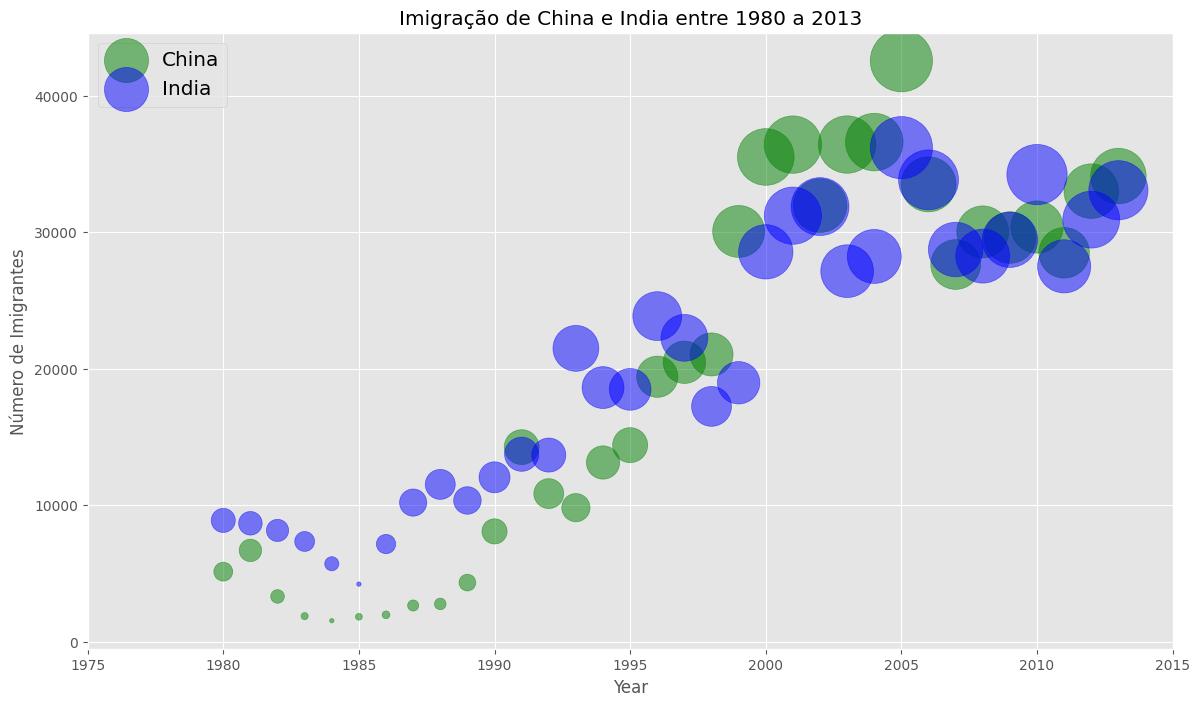

In [40]:
# Plotando os gráficos

#China
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='China',
                    figsize=(14, 8),
                    alpha=0.5,                  # Transparência
                    color='green',
                    s=norm_china * 2000 + 10,  # 
                    xlim=(1975, 2015)
                    )
# India
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='India',
                    alpha=0.5,
                    color="blue",
                    s=norm_india * 2000 + 10,
                    ax = ax0
                    )

ax0.set_ylabel('Número de Imigrantes')
ax0.set_title('Imigração de China e India entre 1980 a 2013')
ax0.legend(['China', 'India'], loc='upper left', fontsize='x-large')